In [1]:
import xarray as xr
import glob,os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [5]:
df = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/test/PNW3L3H_2015-11-01-00_spinup_G00001-00002_1.nc').set_index(hru='hruId')
df

<xarray.Dataset>
Dimensions:                 (gru: 2, hru: 2, midToto: 8, time: 2680)
Coordinates:
  * time                    (time) datetime64[ns] 2015-11-01 ...
  * hru                     (hru) int64 17000001 17000002
Dimensions without coordinates: gru, midToto
Data variables:
    pptrate                 (time, hru) float64 ...
    airtemp                 (time, hru) float64 ...
    basin__AquiferBaseflow  (time, gru) float64 ...
    averageInstantRunoff    (time, gru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    mLayerVolFracLiq        (time, midToto, hru) float64 ...
    scalarTotalSoilWat      (time, hru) float64 ...
    scalarRainPlusMelt      (time, hru) float64 ...
Attributes:
    summaVersion:     v2.0.0
    buildTime:        Wed Jan  3 15:36:08 MST 2018
    gitBranch:        feature/drainableWater-0-ga9

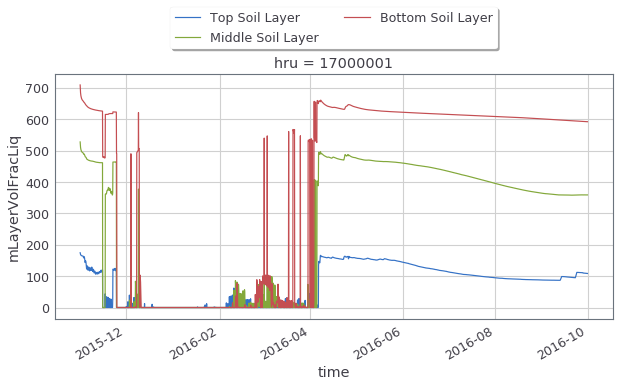

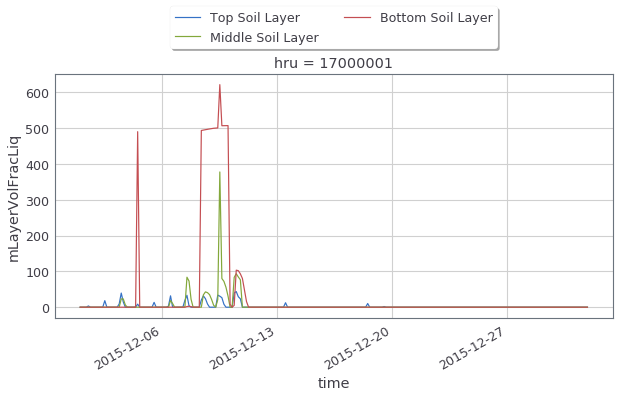

In [7]:
hid = 17000001
iden_water = 1000
starttime = '2015-12-01'
endtime = '2015-12-31'

plt.figure(figsize=(10,5))
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.show()

plt.figure(figsize=(10,5))
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).loc[starttime:endtime].plot(label='Top Soil Layer')
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).loc[starttime:endtime].plot(label='Middle Soil Layer')
(df.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).loc[starttime:endtime].plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.show()